# Datos OCDE

In [31]:
from utils.oecd import get_oecd_data
import matplotlib.pyplot as plt
from pprint import pprint
import pandas as pd

## Agregados monetarios

- [Agregados monetarios](https://data-explorer.oecd.org/vis?tm=monetary&pg=0&snb=54&vw=tb&df[ds]=dsDisseminateFinalDMZ&df[id]=DSD_STES%40DF_MONAGG&df[ag]=OECD.SDD.STES&df[vs]=4.0&pd=2015-01%2C2024-04&dq=BRA.M.MANM.XDC..N...&ly[rw]=REF_AREA&ly[cl]=TIME_PERIOD&to[TIME_PERIOD]=false)
    - `MANM`: M1 (narrow money)
    - `MABM`: M3 (broad money)

In [40]:
id = "OECD.SDD.STES,DSD_STES@DF_MONAGG,4.0/.A......."

df = get_oecd_data(id)

print(f"{df["MEASURE"].unique() = }")
print(f"{df["REF_AREA"].unique() = }")

df

df["MEASURE"].unique() = array(['MANM', 'MABM'], dtype=object)
df["REF_AREA"].unique() = array(['JPN', 'AUS', 'CAN', 'COL', 'CRI', 'CZE', 'HUN', 'ISR', 'KOR',
       'NOR', 'GBR', 'USA', 'EA19', 'OECD', 'OECDE', 'BRA', 'RUS', 'ZAF',
       'ISL', 'CHL', 'DNK', 'MEX', 'NZL', 'POL', 'SWE', 'CHE', 'TUR',
       'BGR', 'CHN', 'IND', 'IDN', 'ROU'], dtype=object)


,DATAFLOW,REF_AREA,FREQ,MEASURE,UNIT_MEASURE,ACTIVITY,ADJUSTMENT,TRANSFORMATION,TIME_HORIZ,METHODOLOGY,OBS_VALUE,OBS_STATUS,UNIT_MULT,DECIMALS,BASE_PER
TIME_PERIOD,,,,,,,,,,,,,,,
1955-01-01,OECD.SDD.STES:DSD_STES@DF_MONAGG(4.0),JPN,A,MANM,IX,_Z,Y,_Z,_Z,N,0.372299,A,0,2,2015.0
1956-01-01,OECD.SDD.STES:DSD_STES@DF_MONAGG(4.0),JPN,A,MANM,IX,_Z,Y,_Z,_Z,N,0.424722,A,0,2,2015.0
1957-01-01,OECD.SDD.STES:DSD_STES@DF_MONAGG(4.0),JPN,A,MANM,IX,_Z,Y,_Z,_Z,N,0.478435,A,0,2,2015.0
1958-01-01,OECD.SDD.STES:DSD_STES@DF_MONAGG(4.0),JPN,A,MANM,IX,_Z,Y,_Z,_Z,N,0.505580,A,0,2,2015.0
1959-01-01,OECD.SDD.STES:DSD_STES@DF_MONAGG(4.0),JPN,A,MANM,IX,_Z,Y,_Z,_Z,N,0.588486,A,0,2,2015.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-01-01,OECD.SDD.STES:DSD_STES@DF_MONAGG(4.0),USA,A,MABM,IX,_Z,Y,_Z,_Z,N,146.534300,A,0,2,2015.0
2021-01-01,OECD.SDD.STES:DSD_STES@DF_MONAGG(4.0),USA,A,MABM,IX,_Z,Y,_Z,_Z,N,170.166700,A,0,2,2015.0
2022-01-01,OECD.SDD.STES:DSD_STES@DF_MONAGG(4.0),USA,A,MABM,IX,_Z,Y,_Z,_Z,N,178.912300,A,0,2,2015.0


In [ ]:
# Dos posibilidades para filtrar:
# df_ = df[(df["MEASURE"]=="MANM") & (df["REF_AREA"]=="USA") & (df["UNIT_MEASURE"]=="IX")].sort_index()
df_ = df.query("MEASURE=='MANM' & REF_AREA in ['JPN', 'USA', 'AUS'] & UNIT_MEASURE=='IX'")[["REF_AREA", "OBS_VALUE"]].sort_index()
df_

,REF_AREA,OBS_VALUE
TIME_PERIOD,,
1955-01-01,JPN,0.372299
1956-01-01,JPN,0.424722
1957-01-01,JPN,0.478435
1958-01-01,JPN,0.505580
1959-01-01,USA,4.646482
...,...,...
2023-01-01,JPN,173.049600
2023-01-01,USA,612.250200
2024-01-01,JPN,177.570100


In [35]:
df_.pivot(columns="REF_AREA", values="OBS_VALUE")

REF_AREA,AUS,JPN,USA
TIME_PERIOD,,,
1955-01-01,NaN,0.372299,NaN
1956-01-01,NaN,0.424722,NaN
1957-01-01,NaN,0.478435,NaN
1958-01-01,NaN,0.505580,NaN
1959-01-01,NaN,0.588486,4.646482
...,...,...,...
2020-01-01,181.7895,143.124900,423.158000
2021-01-01,218.1721,157.198300,640.615200
2022-01-01,243.0333,166.026900,674.957500


<Axes: title={'center': 'Agregado monetario M1'}, xlabel='Año', ylabel='Índice (2015=100)'>

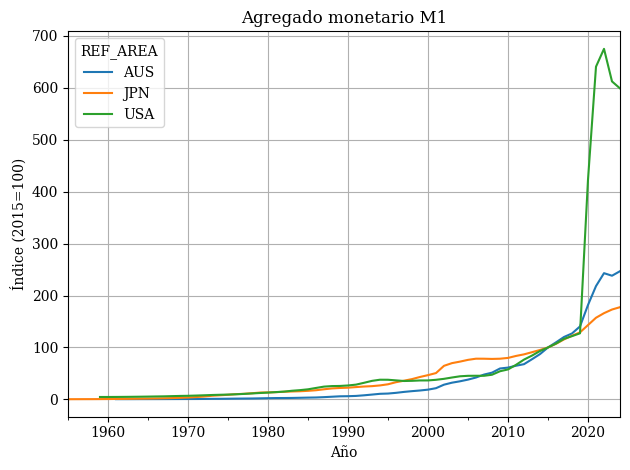

In [36]:
df_.pivot(columns="REF_AREA", values="OBS_VALUE").plot(title='Agregado monetario M1', xlabel='Año', ylabel='Índice (2015=100)')

## Gasto en pensiones públicas


### Porcentaje del PIB

OECD. [Public expenditure on old-age and survivors cash benefits in % GDP](https://data-explorer.oecd.org/vis?lc=en&df[ds]=DisseminateFinalDMZ&df[id]=DSD_SOCX_AGG%40DF_PUB_OLD&df[ag]=OECD.ELS.SPD&df[vs]=1.0&dq=.A..PT_B1GQ....&pd=%2C&to[TIME_PERIOD]=false&vw=tb)

In [62]:
id = "OECD.ELS.SPD,DSD_SOCX_AGG@DF_PUB_OLD,1.0/.A..PT_B1GQ...."

df = get_oecd_data(id)[["OBS_VALUE", "REF_AREA"]]
df

,OBS_VALUE,REF_AREA
TIME_PERIOD,,
1981-01-01,NaN,AUT
1982-01-01,NaN,AUT
1983-01-01,NaN,AUT
1984-01-01,NaN,AUT
1986-01-01,NaN,AUT
...,...,...
2017-01-01,7.908,ROU
2018-01-01,7.740,ROU
2019-01-01,7.682,ROU


<Axes: title={'center': 'Gasto en pensiones públicas'}, ylabel='% del PIB'>

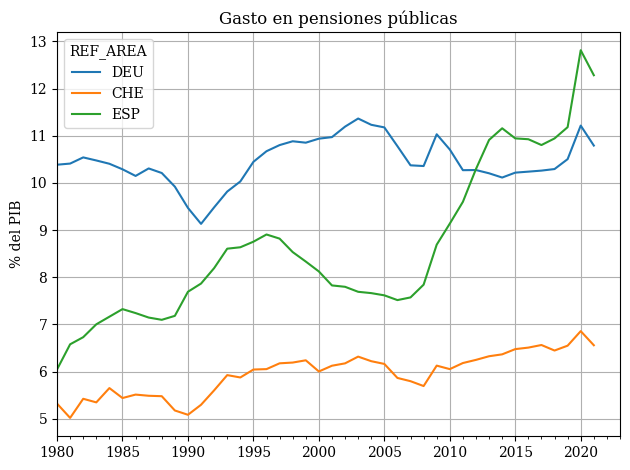

In [63]:
df.pivot_table(
    index="TIME_PERIOD",
    columns="REF_AREA",
    values="OBS_VALUE"
).plot(y=['DEU', 'CHE', 'ESP'], title='Gasto en pensiones públicas', ylabel='% del PIB', xlabel='')

## Porcentaje del gasto público

<Axes: title={'center': 'Gasto en pensiones públicas'}, ylabel='% del gasto público'>

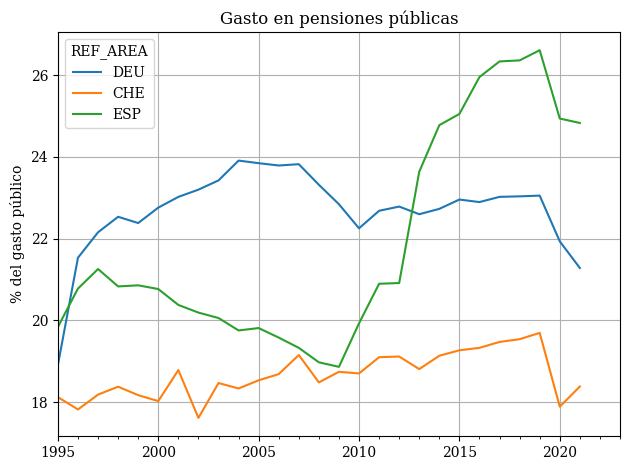

In [64]:
id = "OECD.ELS.SPD,DSD_SOCX_AGG@DF_PUB_OLD,1.0/.A..PT_OTE_S13...."

df = get_oecd_data(id)[["OBS_VALUE", "REF_AREA"]]

df.pivot_table(
    index="TIME_PERIOD",
    columns="REF_AREA",
    values="OBS_VALUE"
).plot(y=['DEU', 'CHE', 'ESP'], title='Gasto en pensiones públicas', ylabel='% del gasto público', xlabel='', xlim=['1995', None])

## Valor presente de las pensiones

OECD. [Pension wealth](https://data-explorer.oecd.org/vis?lc=en&tm=pension&pg=0&snb=177&vw=ov&df[ds]=dsDisseminateFinalDMZ&df[id]=DSD_PAG%40DF_PW&df[ag]=OECD.ELS.SPD&df[vs]=1.0&dq=.A.....&pd=2022%2C2022&to[TIME_PERIOD]=true&isAvailabilityDisabled=false)

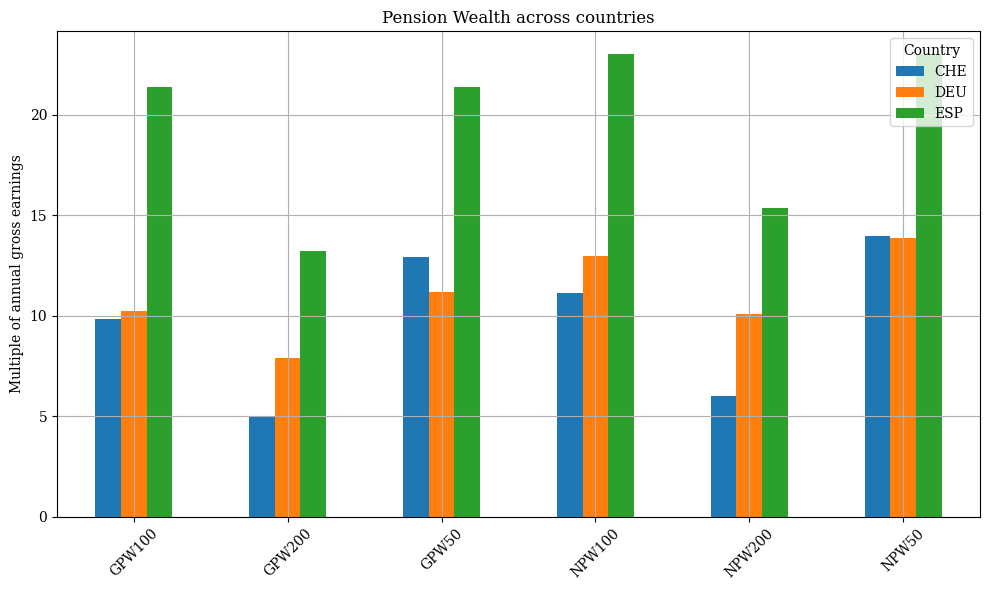

In [65]:
id = "OECD.ELS.SPD,DSD_PAG@DF_PW,1.0/.A....."

df = get_oecd_data(id)[["OBS_VALUE", "REF_AREA", "SEX", "MEASURE"]]

# Average by sex
df_avg = df.groupby(["REF_AREA", "MEASURE"], as_index=False)["OBS_VALUE"].mean()

pivot_df = df_avg.loc[df_avg['REF_AREA'].isin(['ESP', 'CHE', 'DEU'])].pivot(index="MEASURE", columns="REF_AREA", values="OBS_VALUE")

# Make grouped bar chart
ax = pivot_df[["CHE", "DEU", "ESP"]].plot(kind="bar", figsize=(10,6))
plt.title("Pension Wealth across countries")
plt.ylabel("Multiple of annual gross earnings")
plt.xlabel("")
plt.xticks(rotation=45)
plt.legend(title="Country")
plt.tight_layout()
plt.show()

In [66]:
pivot_df.loc[['GPW50', 'GPW100', 'GPW200']].reset_index()

REF_AREA,MEASURE,CHE,DEU,ESP
0,GPW50,12.90,11.20,21.4
1,GPW100,9.85,10.25,21.4
2,GPW200,5.00,7.90,13.2


## Pensions at a Glance

Dataset [Pensions at a Glance](https://data-explorer.oecd.org/vis?df[ds]=DisseminateFinalDMZ&df[id]=DSD_PAG%40DF_PAG&df[ag]=OECD.ELS.SPD&dq=.A.GPRR100....&pd=2019%2C2022&to[TIME_PERIOD]=true&vw=tb&lb=nm)

In [234]:
id = 'OECD.ELS.SPD,DSD_PAG@DF_PAG,/.A.....'

df = get_oecd_data(id)#[["OBS_VALUE", "REF_AREA", "SEX", "MEASURE"]]

### Replace Rate

  REF_AREA  MEASURE  OBS_VALUE
0      CHE  GPRR100       39.9
1      CHE  GPRR200       20.3
2      CHE   GPRR50       52.2
3      DEU  GPRR100       43.9
4      DEU  GPRR200       33.7
5      DEU   GPRR50       47.8
6      ESP  GPRR100       80.4
7      ESP  GPRR200       49.6
8      ESP   GPRR50       80.4


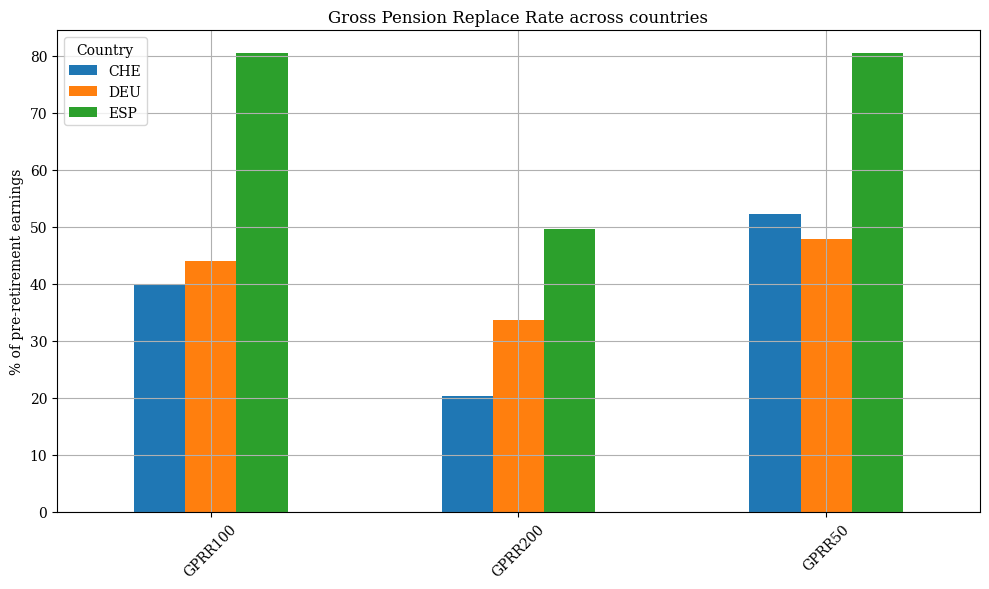

In [235]:
df_avg = df.query('MEASURE in ["GPRR50", "GPRR100", "GPRR200"] & REF_AREA in ["CHE", "DEU", "ESP"] & OPTIONALITY=="M"').groupby(["REF_AREA", "MEASURE"], as_index=False)["OBS_VALUE"].mean()
pprint(df_avg)

df_avg.pivot(index="MEASURE", columns="REF_AREA", values="OBS_VALUE").plot(
    kind="bar",
    title="Gross Pension Replace Rate across countries",
    figsize=(10,6),
    xlabel="",
    ylabel=r"% of pre-retirement earnings",
)

plt.xticks(rotation=45)
plt.legend(title="Country")

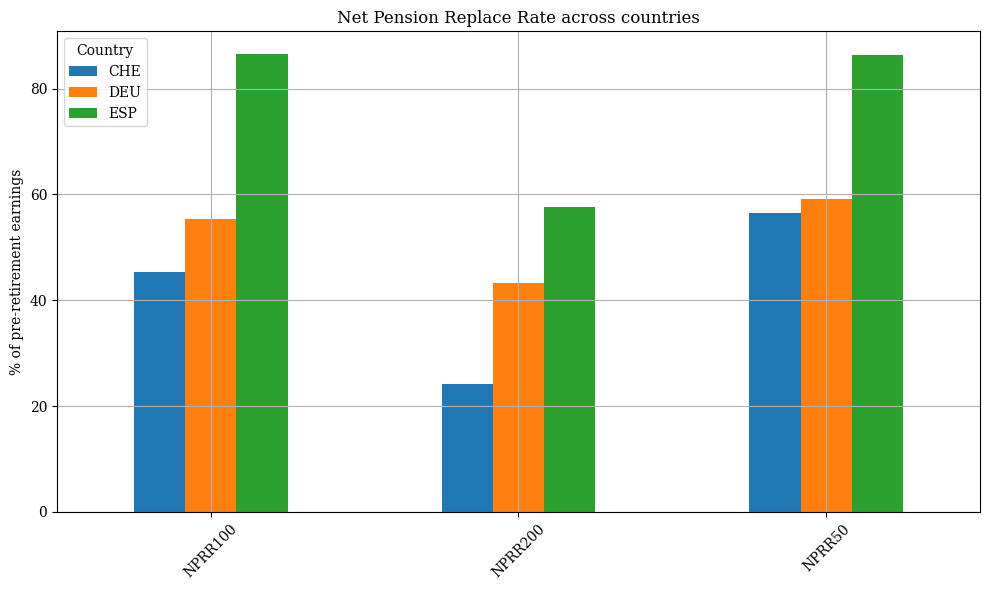

In [236]:
df_avg = df.query('MEASURE in ["NPRR50", "NPRR100", "NPRR200"] & REF_AREA in ["CHE", "DEU", "ESP"] & OPTIONALITY=="M"').groupby(["REF_AREA", "MEASURE"], as_index=False)["OBS_VALUE"].mean()
df_avg.pivot(index="MEASURE", columns="REF_AREA", values="OBS_VALUE").plot(
    kind="bar",
    title="Net Pension Replace Rate across countries",
    figsize=(10,6),
    xlabel="",
    ylabel=r"% of pre-retirement earnings",
)

plt.xticks(rotation=45)
plt.legend(title="Country")

### Impuestos

<Axes: title={'center': 'Average tax rate of pensioners with pension equal to average earnings'}, xlabel='Country', ylabel='Percentage of average earnings'>

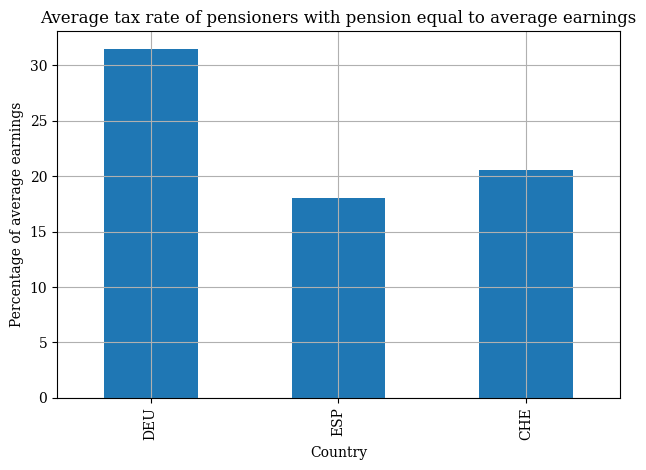

In [237]:
df.query('MEASURE=="ATRPPAE" & REF_AREA in ["CHE", "DEU", "ESP"]').plot(
    x="REF_AREA", 
    y="OBS_VALUE", 
    kind="bar", 
    legend=False, 
    title="Average tax rate of pensioners with pension equal to average earnings",
    xlabel="Country",
    ylabel="Percentage of average earnings"
)

<Axes: title={'center': 'Average tax rate of average earner pensioners'}, xlabel='Country', ylabel='Percentage of pension'>

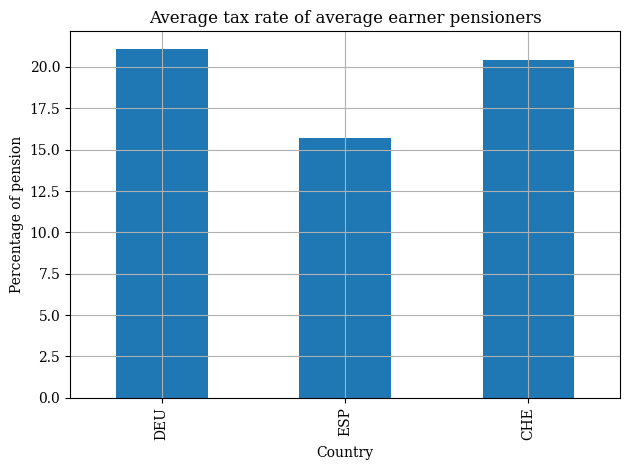

In [238]:
df.query('MEASURE=="ATRAEP" & REF_AREA in ["CHE", "DEU", "ESP"]').plot(
    x="REF_AREA", 
    y="OBS_VALUE", 
    kind="bar", 
    legend=False, 
    title="Average tax rate of average earner pensioners",
    xlabel="Country",
    ylabel="Percentage of pension"
)

<Axes: title={'center': 'Average tax rate of workers'}, xlabel='Country', ylabel='Percentage of average earnings'>

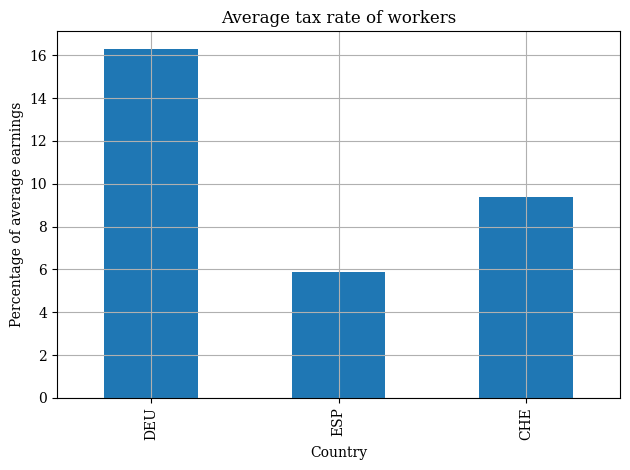

In [239]:
df.query('MEASURE=="ATRW" & REF_AREA in ["CHE", "DEU", "ESP"]').plot(
    x="REF_AREA", 
    y="OBS_VALUE", 
    kind="bar", 
    legend=False, 
    title="Average tax rate of workers",
    xlabel="Country",
    ylabel="Percentage of average earnings"
)

### Ratio de pobreza

/var/folders/_k/cjs92jqd55d7zxsb0vw54b640000gn/T/ipykernel_57246/328569441.py:1: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  df.query('MEASURE=="OAIP" & REF_AREA in ["CHE", "DEU", "ESP"] & AGE=="_T" & TIME_PERIOD=="2016-01-01"').plot(


<Axes: title={'center': 'Old age income poverty rate below 50% of median income'}, xlabel='Country', ylabel='Percentage of population in the same sex and age'>

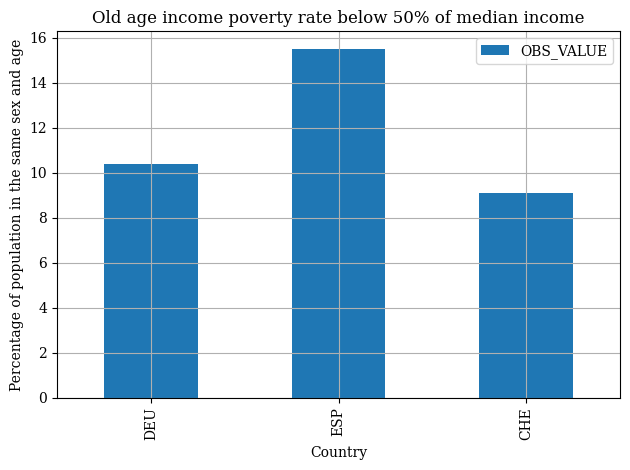

In [240]:
df.query('MEASURE=="OAIP" & REF_AREA in ["CHE", "DEU", "ESP"] & AGE=="_T" & TIME_PERIOD=="2016-01-01"').plot(
    x="REF_AREA", 
    y="OBS_VALUE", 
    kind="bar", 
    title=r"Old age income poverty rate below 50% of median income",
    xlabel="Country",
    ylabel="Percentage of population in the same sex and age"
)


### Gasto público

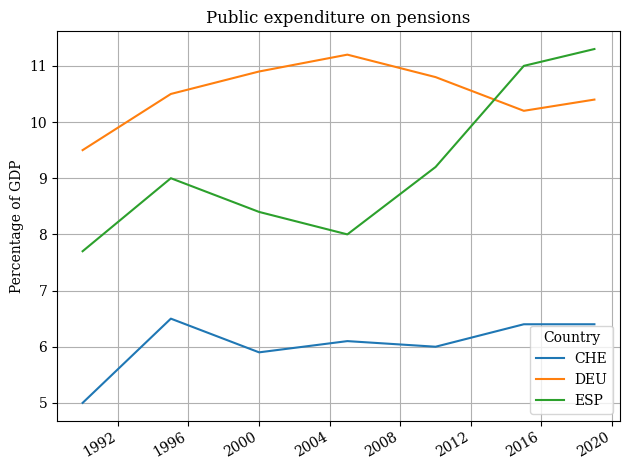

In [241]:
df.query('MEASURE=="PEP" & REF_AREA in ["CHE", "DEU", "ESP"]').pivot(columns="REF_AREA", values="OBS_VALUE").plot(
    title="Public expenditure on pensions",
    xlabel="",
    ylabel="Percentage of GDP",
)
plt.legend(title="Country")

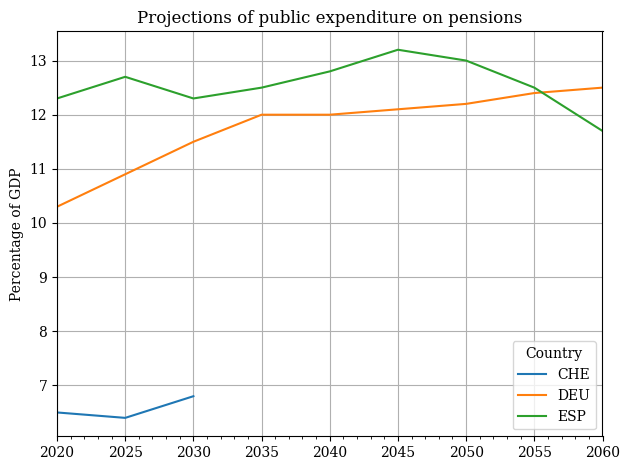

In [242]:
df.query('MEASURE=="PPEP" & REF_AREA in ["CHE", "DEU", "ESP"]').pivot(columns="REF_AREA", values="OBS_VALUE").plot(
    title="Projections of public expenditure on pensions",
    xlabel="",
    ylabel="Percentage of GDP",
)
plt.legend(title="Country")

### Fuente de los ingresos

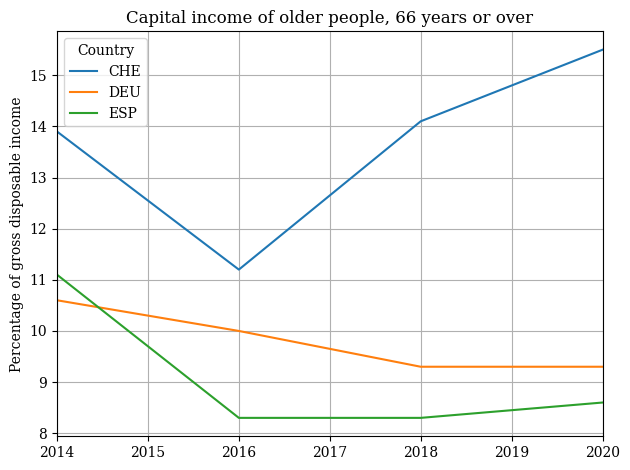

In [243]:
df.query('MEASURE=="CIOP" & REF_AREA in ["CHE", "DEU", "ESP"]').pivot(columns="REF_AREA", values="OBS_VALUE").plot(
    title="Capital income of older people, 66 years or over",
    xlabel="",
    ylabel="Percentage of gross disposable income",
)
plt.legend(title="Country")

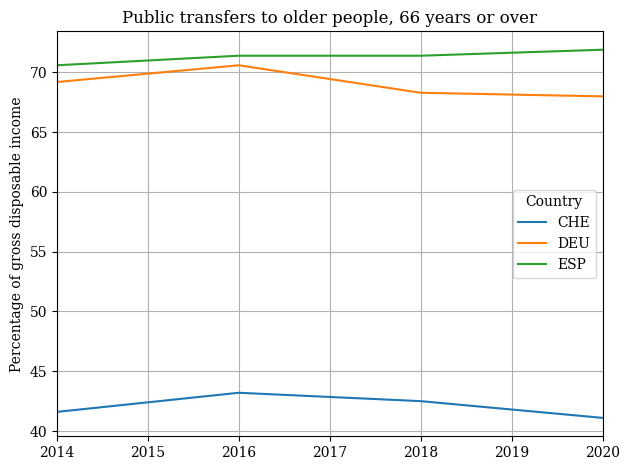

In [244]:
df.query('MEASURE=="PTOP" & REF_AREA in ["CHE", "DEU", "ESP"]').pivot(columns="REF_AREA", values="OBS_VALUE").plot(
    title="Public transfers to older people, 66 years or over",
    xlabel="",
    ylabel="Percentage of gross disposable income",
)
plt.legend(title="Country")

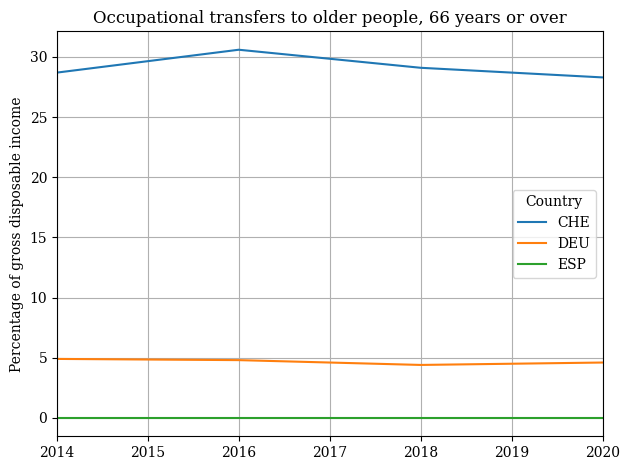

In [245]:
df.query('MEASURE=="OCOP" & REF_AREA in ["CHE", "DEU", "ESP"]').pivot(columns="REF_AREA", values="OBS_VALUE").plot(
    title="Occupational transfers to older people, 66 years or over",
    xlabel="",
    ylabel="Percentage of gross disposable income",
)
plt.legend(title="Country")

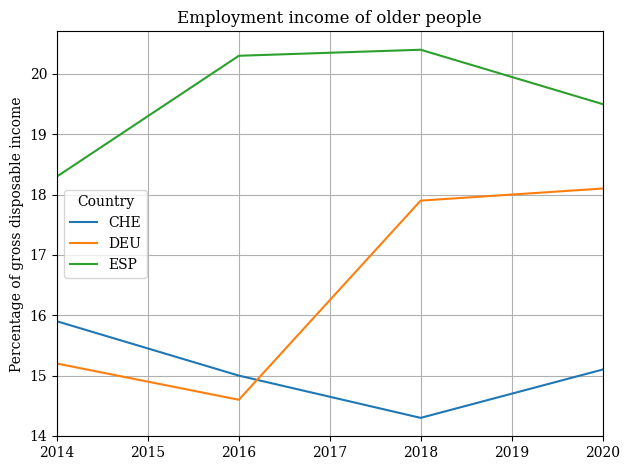

In [246]:
df.query('MEASURE=="EIOP" & REF_AREA in ["CHE", "DEU", "ESP"]').pivot(columns="REF_AREA", values="OBS_VALUE").plot(
    title="Employment income of older people",
    xlabel="",
    ylabel="Percentage of gross disposable income",
)
plt.legend(title="Country")

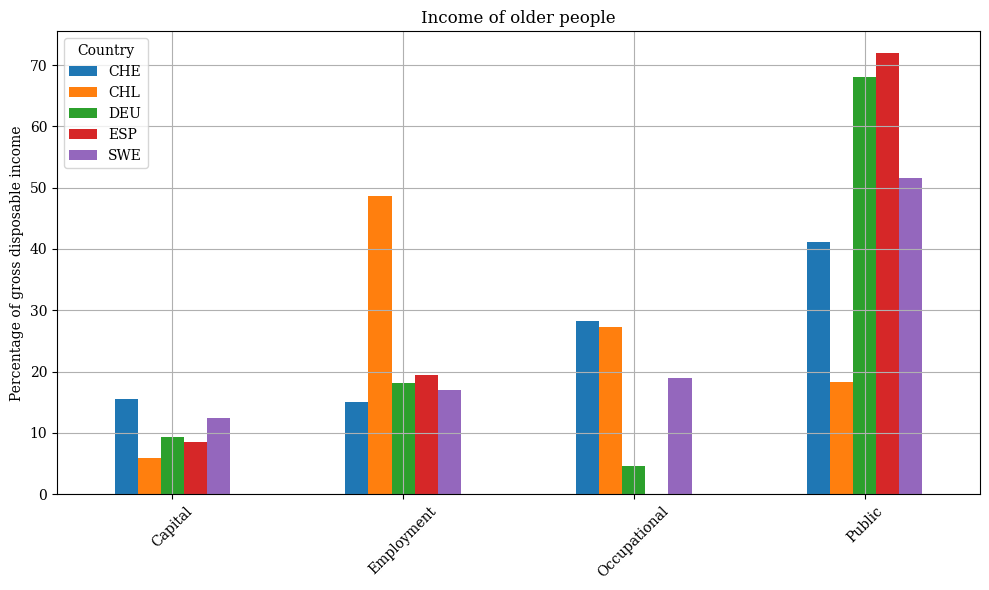

In [249]:
subset = df.query('MEASURE in ["EIOP", "CIOP", "OCOP", "PTOP"] & REF_AREA in ["CHE", "DEU", "ESP", "CHL", "SWE"]')

ax = subset.loc[subset.index.max()].pivot(index="MEASURE", columns="REF_AREA", values="OBS_VALUE").plot(
    kind="bar",
    title="Income of older people",
    figsize=(10,6),
    xlabel="",
    ylabel="Percentage of gross disposable income",
)
ax.set_xticklabels(["Capital", "Employment", "Occupational", "Public"], rotation=45)
ax.legend(title="Country")

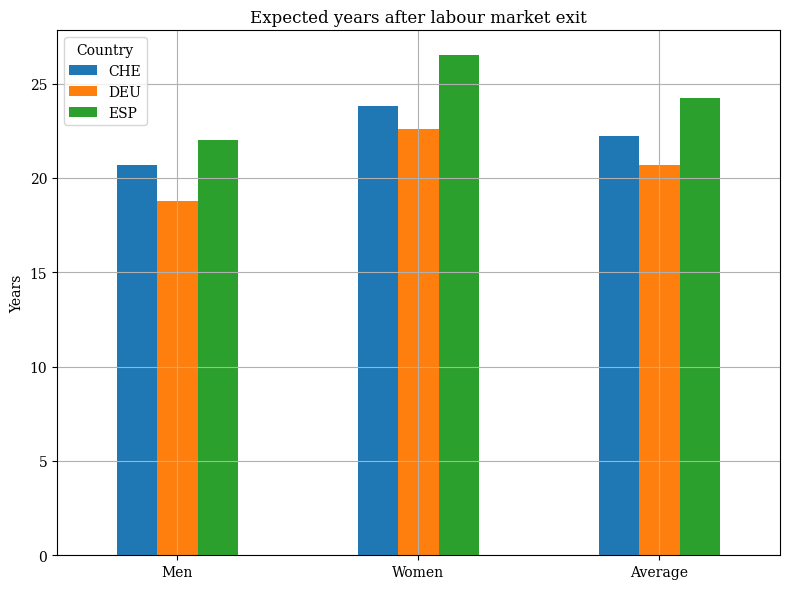

In [248]:
subset = df.query('MEASURE=="EYLME" & REF_AREA in ["CHE", "DEU", "ESP"]')

latest = subset.loc[subset.index.max()].copy()

# 3) Wide table: rows=countries, cols=sex
wide = latest.pivot(index="REF_AREA", columns="SEX", values="OBS_VALUE")

# 4) Compute (simple) average of men & women
wide["Average"] = wide[["M", "F"]].mean(axis=1)

# 5) Nicer column names & consistent order
wide = wide.rename(columns={"M": "Men", "F": "Women"})[["Men", "Women", "Average"]]

ax = wide.T.plot(
    kind="bar",
    figsize=(8,6),
    title="Expected years after labour market exit",
    xlabel="",
    ylabel="Years"
)

ax.legend(title="Country", loc="best")
ax.tick_params(axis="x", labelrotation=0)

### Ratio de fertilidad

<Axes: title={'center': 'Fertility rate'}, ylabel='Children per woman'>

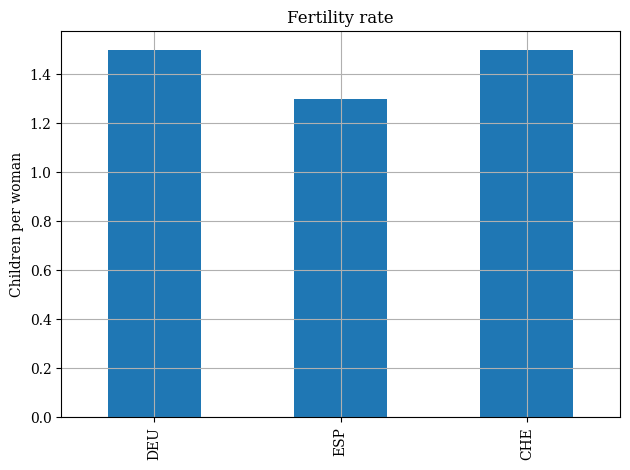

In [215]:
df.query('MEASURE=="FR" & REF_AREA in ["CHE", "DEU", "ESP"]').plot(
    x="REF_AREA", 
    y="OBS_VALUE", 
    kind="bar",
    title="Fertility rate",
    xlabel="",
    ylabel="Children per woman",
    legend=False
)